In [1]:
!pip install mglearn

In [2]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.svm import LinearSVC

In [4]:
X, y = make_forge()

In [5]:
model = LinearSVC(C=10).fit(X, y)

C:\Users\JH\anaconda3\envs\GJ_AI\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


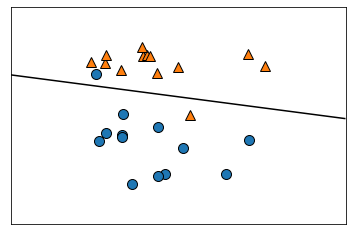

In [6]:
mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

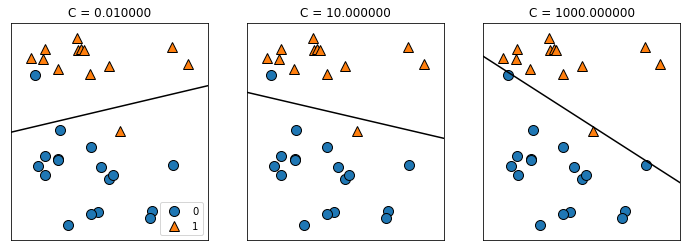

In [7]:
mglearn.plots.plot_linear_svc_regularization()

In [8]:
from sklearn.datasets import load_wine

# 데이터 로드
wine = load_wine()

In [9]:
# 훈련셋 및 테스트셋 분리
from sklearn.model_selection import train_test_split
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(133, 13)

In [10]:
# 모델학습
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=42).fit(X_train, y_train)

C:\Users\JH\anaconda3\envs\GJ_AI\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
# 스코어 확인
model.score(X_train, y_train), model.score(X_test, y_test)

(0.849624060150376, 0.9555555555555556)

In [12]:
# 예측
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 1 0 1 1 1]


In [13]:
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs


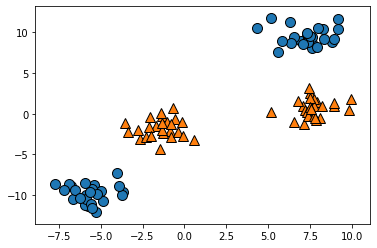

In [16]:
X,y=make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#이진 분류세트 


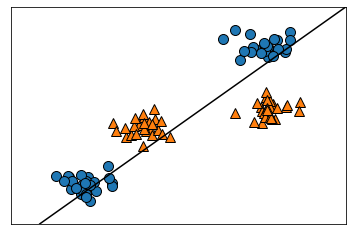

In [17]:
# 선형 분류
from sklearn.svm import LinearSVC

model = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0.5, 0, 'feature 1**2')

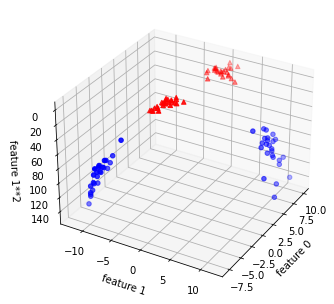

In [27]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가
X_new= np.hstack([X,X[:,1:]**2])

# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig, azim=-30, elev=-150)
# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b')
#mask = y==1
# ~ 비트 NOT : x의 비트를 뒤집음
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^')

plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1**2')

(50, 50) (50, 50) (50, 50)


Text(0.5, 0, 'feature 1**2')

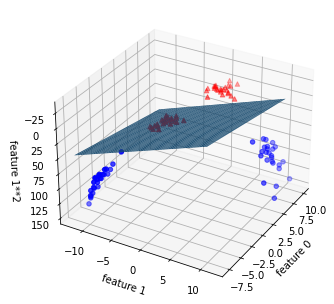

In [31]:
model = LinearSVC().fit(X_new,y)
w,b=model.coef_.ravel(),model.intercept_

# 선형 결정 경계 그리기
# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig, azim=-30, elev=-150)
xx = np.linspace(X_new[:,0].min(),X_new[:,0].max(),50)
yy = np.linspace(X_new[:,1].min(),X_new[:,0].max(),50)

XX,YY = np.meshgrid(xx,yy)
ZZ = -(w[0]*xx+w[1]*YY+b)/w[2]
print(XX.shape,YY.shape,ZZ.shape)
ax.plot_surface(XX,YY,ZZ)
# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b')
#mask = y==1
# ~ 비트 NOT : x의 비트를 뒤집음
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^')

plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1**2')

In [ ]:
# 분류 결과 시각화


사용된 서포트 벡터 :  11


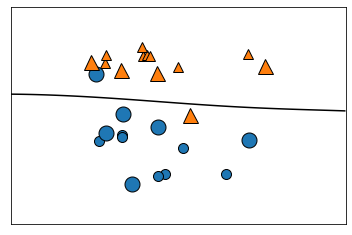

In [44]:
from sklearn.svm import SVC

X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
model = SVC(C=1, gamma=0.1).fit(X,y) #c,gamma 변환해보기
mglearn.plots.plot_2d_separator(model,X)
sv = model.support_vectors_
print('사용된 서포트 벡터 : ', len(sv))
sv_y = model.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_y,s=15)

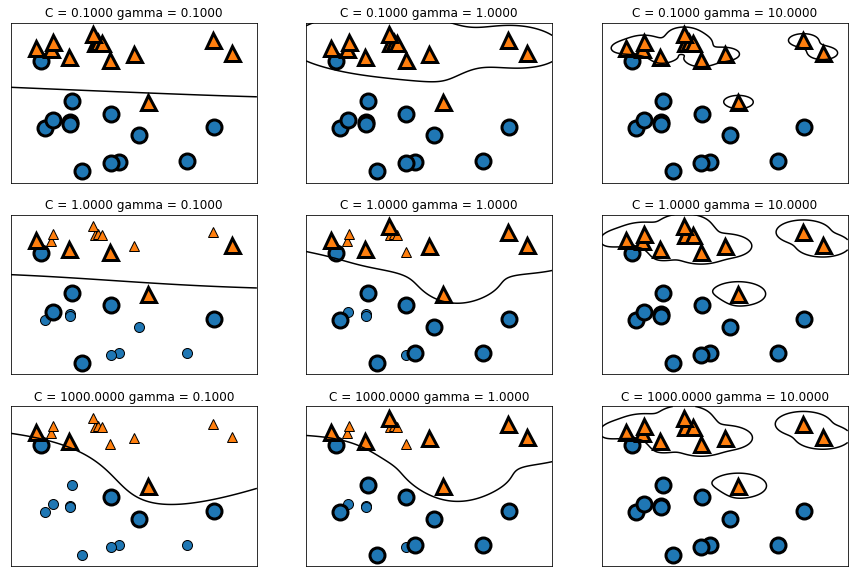

In [45]:
#c,gamma 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3,3,figsize=(15,10))
for C, axs in zip([-1,0,3], axes):
    for gamma, ax in zip([-1,0,1],axs):
        mglearn.plots.plot_svm(C,gamma,ax)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()
#X,y=mglearn.datasets.load_breast_cancer()
# 모델 학습
X = cancer.data
y = cancer.target
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state=0)

model = SVC(C=1,gamma=0.1).fit(train_X,train_y)
# 평가
model.score(train_X,train_y), model.score(test_X,test_y)

(1.0, 0.6293706293706294)

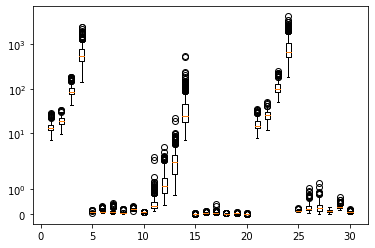

In [61]:
#데이터셋 특성값 범위 시각화(y 혹은 로그 스케일)
plt.boxplot(train_X,manage_ticks=False)
plt.yscale('symlog')
plt.show()

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X_scaler = scaler.transform(train_X)
test_X_scaler = scaler.transform(test_X)
train_X_scaler

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])